In [1]:
import joblib
import lightgbm as lgb
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

SEED = 42

warnings.filterwarnings('ignore')

In [2]:
df = joblib.load('joblib_files/data_processed.plk')
df.head()

,aux_actual_atemp,registered,temp_binarized,temp_quantized,temp,rush_hour,casual,hum_binarized,atemp_squared,atemp,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,14.395,13,0.0,0.0,0.24,0,3,0.0,0.082886,0.2879,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,13.635,32,0.0,0.0,0.22,0,8,0.0,0.074365,0.2727,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,13.635,27,0.0,0.0,0.22,0,5,0.0,0.074365,0.2727,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,14.395,10,0.0,0.0,0.24,0,3,0.0,0.082886,0.2879,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,14.395,1,0.0,0.0,0.24,0,0,0.0,0.082886,0.2879,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:

# Dropping columns that are not required for modeling casual + registered = cnt
X = df.drop(columns=['cnt', 'dteday', 'casual', 'registered'])

# Target variable
y = df['cnt']
# Splitting the data into training (60%), validation (20%), and testing (20%) sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

X_train.shape, X_val.shape, X_test.shape


((10427, 69), (3476, 69), (3476, 69))

In [6]:
import pickle

with open('./joblib_files/y_test.plk', "wb") as file:
    pickle.dump(y_test, file)

In [4]:
import plotly.graph_objects as go
import plotly.express as px

def plot_predictions(elements, title, pred):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=list(range(elements)), y=y_test.values[:elements],
                             mode='lines+markers', name='Actual', line=dict(color='skyblue'),
                             marker=dict(size=6)))
    fig.add_trace(go.Scatter(x=list(range(elements)), y=pred[:elements],
                             mode='lines+markers', name='Predicted',
                             line=dict(color='coral', dash='dash', width=1),
                             marker=dict(size=6)))

    fig.update_layout(title=f'Actual vs Predicted Bike Rentals ({title})',
                      xaxis_title='Sample',
                      yaxis_title='Number of Bike Rentals',
                      legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
                      showlegend=True,
                      height=700, width=1200)

    fig.show()




In [5]:
def predict_metric(model_p, feature=False):
    if not feature:
        # [5] Predict
        pred_train = model_p.predict(X_train) # predict!
        pred_val = model_p.predict(X_val) # predict!
        pred_test = model_p.predict(X_test) # predict!
        
        # [6] Compute metric
        mae_train = mean_absolute_error(y_train, pred_train)
        mae_val = mean_absolute_error(y_val, pred_val)
        mae_test = mean_absolute_error(y_test, pred_test)
        
        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        mse_test = mean_squared_error(y_test, pred_test)
        
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)
        r2_test = r2_score(y_test, pred_test)
    else:
        # [5] Predict
        pred_train = model_p.predict(X_train[feature]) # predict!
        pred_val = model_p.predict(X_val[feature]) # predict!
        pred_test = model_p.predict(X_test[feature]) # predict!
        
        # [6] Compute metric
        mae_train = mean_absolute_error(y_train, pred_train)
        mae_val = mean_absolute_error(y_val, pred_val)
        mae_test = mean_absolute_error(y_test, pred_test)
        
        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        mse_test = mean_squared_error(y_test, pred_test)
        
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)
        r2_test = r2_score(y_test, pred_test)
    print(f'MAE: train {mae_train:.4f}, validation {mae_val:.4f}, test {mae_test:.4f}')
    print(f'MSE: train {mse_train:.4f}, validation {mse_val:.4f}, test {mse_test:.4f}')
    print(f'R2: train {r2_train:.4f}, validation {r2_val:.4f}, test {r2_test:.4f}')
    return pred_test

# Linear Regression

In [8]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [9]:
pred_test_linear = predict_metric(linear_model)

MAE: train 8.2300, validation 7.8869, test 8.0224
MSE: train 428.9310, validation 409.0490, test 409.4724
R2: train 0.1718, validation 0.1824, test 0.1597


The results are quite poor, let's try with other models

In [10]:
joblib.dump(pred_test_linear, 'joblib_files/pred_linear_reg.plk')

['joblib_files/pred_linear_reg.plk']

In [7]:
li = joblib.load('joblib_files/pred_linear_reg.plk')

In [9]:
with open('./joblib_files/pred_linear_reg.plk', "wb") as file:
    pickle.dump(li, file)

In [17]:
plot_predictions(500, 'Linear Regression', pred_test_linear)

# Random Forest

In [9]:
reduced_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [10]:
reduced_grid_search = GridSearchCV(RandomForestRegressor(random_state=SEED), reduced_param_grid, 
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [11]:
reduced_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [12]:
joblib.dump(reduced_grid_search, 'grid_search_RF.plk')

['grid_search_RF.plk']

In [10]:
grid_rf = joblib.load('joblib_files/grid_search_RF.plk')

In [11]:
if not grid_rf:
    best_model = reduced_grid_search.best_params_
else:
    best_model = grid_rf.best_params_
best_model

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [15]:
if not grid_rf:
    print(reduced_grid_search.best_score_)
else:
    print(grid_rf.best_score_)

-117.13695698432579


In [16]:
model_rf = RandomForestRegressor(max_depth=best_model['max_depth'],
                              min_samples_leaf=best_model['min_samples_leaf'],
                              min_samples_split=best_model['min_samples_split'],
                              n_estimators=best_model['n_estimators'],
                              # max_features=best_model['max_features'],
                              random_state=SEED)
# [4] Train model
model_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [17]:
pred_test_rf = predict_metric(model_rf)

MAE: train 0.9872, validation 1.7541, test 1.6608
MSE: train 36.3590, validation 125.3670, test 112.5398
R2: train 0.9298, validation 0.7494, test 0.7690


In [26]:
joblib.dump(pred_test_rf, 'joblib_files/pred_random_forest.plk')

['joblib_files/pred_random_forest.plk']

In [10]:
li = joblib.load('joblib_files/pred_random_forest.plk')
with open('joblib_files/pred_random_forest.plk', "wb") as file:
    pickle.dump(li, file)

### ATTEMPT 1:

```
reduced_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
```

| Metric | Train   | Validation | Test    |
|--------|---------|------------|---------|
| MAE    | 0.9872  | 1.7541     | 1.6608  |
| MSE    | 36.3590 | 125.3670   | 112.5398|
| R2     | 0.9298  | 0.7494     | 0.7690  |

* MAE -> the error is too low in train but a bit bigger in validation and test suggesting overfitting
* MSE -> The overfitting is more clear
* R2 -> It performs worse in unseen data

### ATTEMPT 2:

```
reduced_param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [4,5,6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt', 'log2'],
}
```

| Metric | Train    | Validation | Test    |
|--------|----------|------------|---------|
| MAE    | 4.0496   | 4.1308     | 3.9414  |
| MSE    | 260.1930 | 271.2116   | 273.0711|
| R2     | 0.4976   | 0.4579     | 0.4396  |


* We have reduced the overfitting. However, the results are worse.

### ATTEMPT 3:

```
reduced_param_grid = {
    'n_estimators': [500],
    'max_depth': [10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
}
```

| Metric | Train    | Validation | Test    |
|--------|----------|------------|---------|
| MAE    | 1.7801   | 2.9746     | 2.7659  |
| MSE    | 59.2387  | 167.5455   | 174.0075|
| R2     | 0.8856   | 0.6651     | 0.6429  |


* The more we increase max_depth, the more overfitting we have.
    

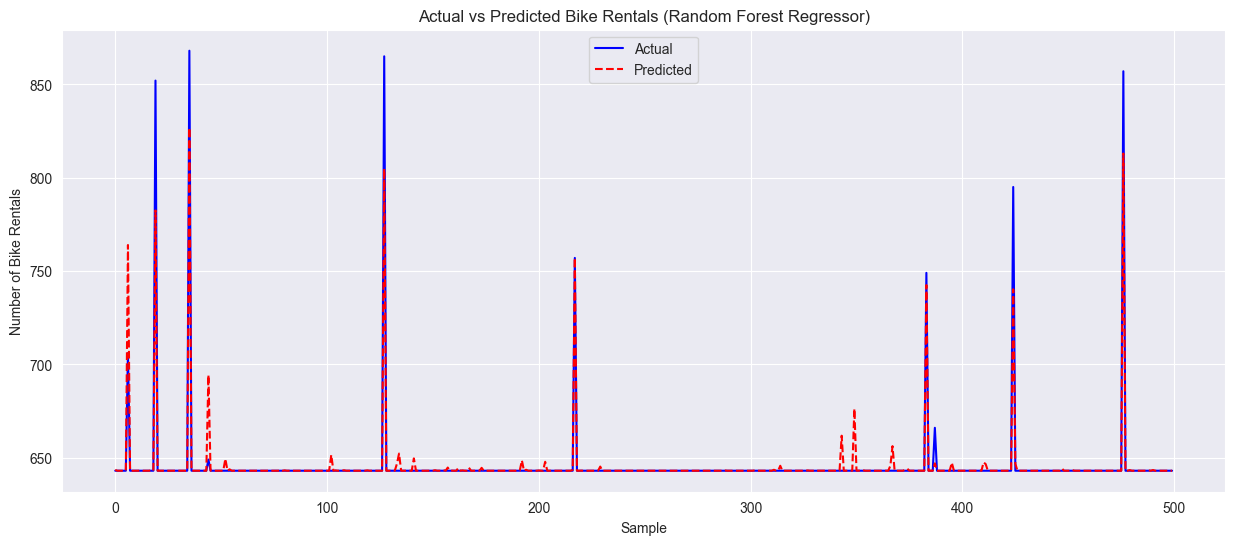

In [17]:
plot_predictions(500, 'Random Forest Regressor', pred_test_rf)

# XGBoost

In [18]:
n_estimators_values = [200, 500]
learning_rate_values = [0.02,0.05]
max_depth_values = [12, 18]
min_child_weight_values = [15]
subsample_values = [0.8]
colsample_bytree_values = [0.2, 0.4]
# gamma_values = [0, 0.1]
# lambda_values = [1, 10]
# alpha_values = [1, 10]

params_grid = {
    'n_estimators': n_estimators_values,
    'learning_rate': learning_rate_values,
    'max_depth': max_depth_values,
    'min_child_weight': min_child_weight_values,
    'subsample': subsample_values,
    'colsample_bytree': colsample_bytree_values,
    # 'gamma': gamma_values,
    # 'lambda': lambda_values,
    # 'alpha': alpha_values
}


In [19]:
# Model initialization
model = XGBRegressor(
    early_stopping_rounds=20,
    eval_metric="rmse",
    device='cuda',
    tree_method='gpu_hist',
    random_state=SEED
)

# Grid search with cross-validation
grid_search_xgb = GridSearchCV(model, params_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=2)

X_train['week_of_year'] = X_train['week_of_year'].astype('int32')
X_val['week_of_year'] = X_val['week_of_year'].astype('int32')
X_test['week_of_year'] = X_test['week_of_year'].astype('int32')

# Fitting the model
grid_search_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[0]	validation_0-rmse:22.32396
[1]	validation_0-rmse:22.29669
[2]	validation_0-rmse:22.18576
[3]	validation_0-rmse:22.10056
[4]	validation_0-rmse:22.05652
[5]	validation_0-rmse:22.04080
[6]	validation_0-rmse:22.03148
[7]	validation_0-rmse:22.00975
[8]	validation_0-rmse:21.87137
[9]	validation_0-rmse:21.85581
[10]	validation_0-rmse:21.83854
[11]	validation_0-rmse:21.79388
[12]	validation_0-rmse:21.74462
[13]	validation_0-rmse:21.63567
[14]	validation_0-rmse:21.60921
[15]	validation_0-rmse:21.56407
[16]	validation_0-rmse:21.54075
[17]	validation_0-rmse:21.47602
[18]	validation_0-rmse:21.44377
[19]	validation_0-rmse:21.42755
[20]	validation_0-rmse:21.34851
[21]	validation_0-rmse:21.31894
[22]	validation_0-rmse:21.19723
[23]	validation_0-rmse:21.19089
[24]	validation_0-rmse:21.16169
[25]	validation_0-rmse:21.13661
[26]	validation_0-rmse:21.06223
[27]	validation_0-rmse:21.04728
[28]	validation_0-rmse:21.04312
[29]	validation_0-rms

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=20,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.2, 0.4],
                         'learning_rate': [0.02, 0.05], 'max_depth': [12, 18],
                         'min_child_weight': [15], 'n_estimators': [200, 500],
                         'subsample': [0.8]},
             scoring='neg_mean_squared_error', verbose=2)

In [20]:
joblib.dump(grid_search_xgb, 'grid_search_XGB.plk')

['grid_search_XGB.plk']

In [19]:
grid_xgb = joblib.load('joblib_files/grid_search_XGB.plk')

In [21]:
if not grid_xgb:
    best_params_xgb = grid_search_xgb.best_params_
else:
    best_params_xgb = grid_xgb.best_params_
best_params_xgb

{'colsample_bytree': 0.4,
 'learning_rate': 0.05,
 'max_depth': 12,
 'min_child_weight': 15,
 'n_estimators': 500,
 'subsample': 0.8}

In [22]:
model_xgb = XGBRegressor(
    early_stopping_rounds=20,
    eval_metric="rmse",
    tree_method='gpu_hist',
    random_state=SEED,
    colsample_bytree=best_params_xgb['colsample_bytree'],
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    min_child_weight=best_params_xgb['min_child_weight'],
    n_estimators=best_params_xgb['n_estimators'],
    subsample=best_params_xgb['subsample'],  # Corrected 'subsamble' typo to 'subsample'
    # gamma=best_params_xgb['gamma'],
    # reg_lambda=best_params_xgb['lambda'],
    # reg_alpha=best_params_xgb['alpha']
)


model_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

[0]	validation_0-rmse:21.95657
[1]	validation_0-rmse:21.74825
[2]	validation_0-rmse:21.26510
[3]	validation_0-rmse:21.04139
[4]	validation_0-rmse:20.89454
[5]	validation_0-rmse:20.83936
[6]	validation_0-rmse:20.70418
[7]	validation_0-rmse:20.53844
[8]	validation_0-rmse:20.10917
[9]	validation_0-rmse:20.03539
[10]	validation_0-rmse:19.93914
[11]	validation_0-rmse:19.75512
[12]	validation_0-rmse:19.44257
[13]	validation_0-rmse:18.88097
[14]	validation_0-rmse:18.48954
[15]	validation_0-rmse:18.24189
[16]	validation_0-rmse:18.19501
[17]	validation_0-rmse:17.88192
[18]	validation_0-rmse:17.85956
[19]	validation_0-rmse:17.66810
[20]	validation_0-rmse:17.34963
[21]	validation_0-rmse:17.20012
[22]	validation_0-rmse:17.00472
[23]	validation_0-rmse:16.91835
[24]	validation_0-rmse:16.88072
[25]	validation_0-rmse:16.69509
[26]	validation_0-rmse:16.61886
[27]	validation_0-rmse:16.58512
[28]	validation_0-rmse:16.51109
[29]	validation_0-rmse:16.11980
[30]	validation_0-rmse:15.96572
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=20,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=15, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
pred_test_xgb = predict_metric(model_xgb)

MAE: train 2.0232, validation 3.4166, test 3.1178
MSE: train 42.5883, validation 142.1871, test 135.3870
R2: train 0.9178, validation 0.7158, test 0.7222


In [25]:
joblib.dump(pred_test_xgb, 'joblib_files/pred_xgb.plk')

['joblib_files/pred_xgb.plk']

In [11]:
li = joblib.load('joblib_files/pred_xgb.plk')
with open('joblib_files/pred_xgb.plk', "wb") as file:
    pickle.dump(li, file)

### ATTEMPT 1:

```
n_estimators_values = [200, 500]
learning_rate_values = [0.02,0.05]
max_depth_values = [12, 18]
min_child_weight_values = [15]
subsample_values = [0.8]
colsample_bytree_values = [0.2,0.4]
```

| Metric | Train   | Validation | Test    |
|--------|---------|------------|---------|
| MAE    | 2.0232  | 3.4166     | 3.1178  |
| MSE    | 42.5883 | 142.1871   | 135.3870|
| R2     | 0.9178  | 0.7158     | 0.7222  |

* The results are similar to Random Forest. Let's try to improve it.

### ATTEMPT 2 & 3:

```
n_estimators_values = [300]
learning_rate_values = [0.01]
max_depth_values = [12]
min_child_weight_values = [1, 2]
subsample_values = [0.8]
colsample_bytree_values = [0.6]
gamma_values = [0, 0.1]
lambda_values = [1, 10]
alpha_values = [1, 10]
```
```
n_estimators_values = [300]
learning_rate_values = [0.01, 0.05]
max_depth_values = [10, 12]
min_child_weight_values = [1, 2]
subsample_values = [0.8]
colsample_bytree_values = [0.4, 0.6]
gamma_values = [0, 0.1]
lambda_values = [1, 10]
alpha_values = [1, 10]
```

| Metric | Train   | Validation | Test    |
|--------|---------|------------|---------|
| MAE    | 1.3223  | 2.6211     | 2.4499  |
| MSE    | 35.1524 | 132.1773   | 135.8531|
| R2     | 0.9321  | 0.7358     | 0.7212  |

* We have slightly improved the MAE. It is clear that we have overfitting. 
* We have tried different approach as regularization Alpha and Lambda but the result is not significant better

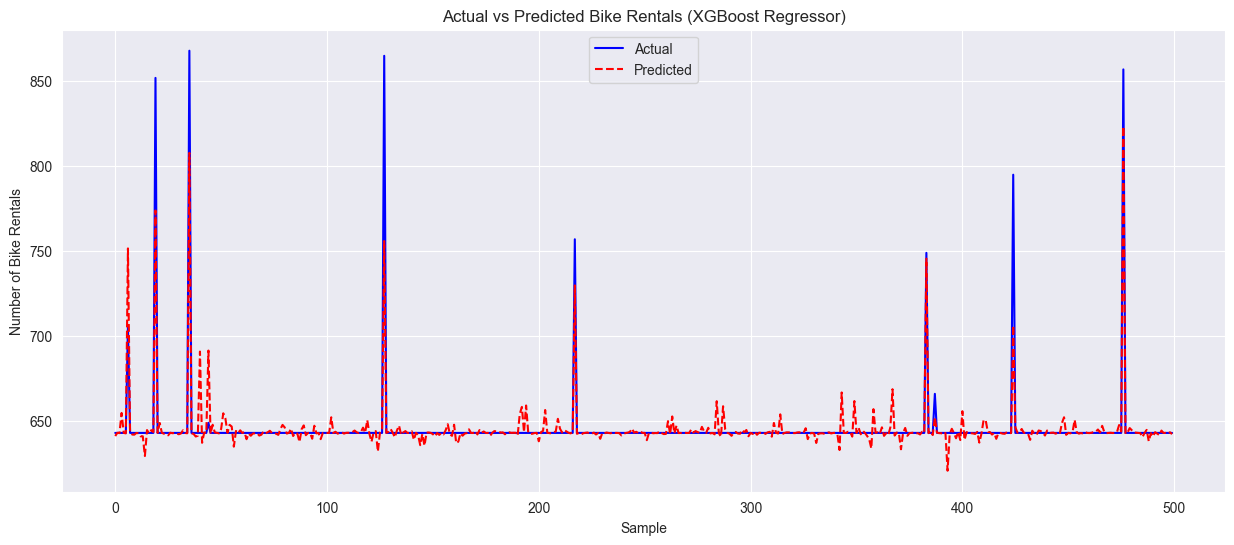

In [24]:
plot_predictions(500, 'XGBoost Regressor', pred_test_xgb)

# Lightgbm

In [25]:
# Base parameters
lgb_params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'tree_learner': 'serial',
    'seed': SEED,
    'device_type': 'gpu',
    'metric': 'rmse',
}


params_grid = {
    'learning_rate': [0.05, 0.08],
    'colsample_bytree': [0.5, 0.6],
    'subsample': [0.7, 0.8],
    'n_estimators': [2000, 3000],
    'early_stopping_rounds': [100]
}

params_grid_2 = {
    'learning_rate': [0.02],
    'colsample_bytree': [0.4, 0.5],
    'subsample': [0.8],
    'n_estimators': [300],
    'early_stopping_rounds': [30, 50],
    'lambda_l1': [1, 5],
    'lambda_l2': [1, 5],
    'max_depth': [6, 8],
    'min_child_samples': [20, 30],
    'feature_fraction': [0.6, 0.7],
    'bagging_fraction': [0.7, 0.8],
    'bagging_freq': [5, 7],
    'num_leaves': [30, 40]
}

In [26]:
# Set up LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(**lgb_params)

# Set up grid search with cross-validation
grid_search = GridSearchCV(
    lgb_regressor, 
    param_grid=params_grid, 
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=0
)

In [27]:
# Run the grid search
grid_search.fit(X_train, y_train, eval_metric='mse', eval_set=[(X_val, y_val)])

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 8341, number of negative: 0
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 8341, number of used features: 64
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 19 dense feature groups (0.16 MB) transferred to GPU in 0.002084 secs. 1 sparse feature groups
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=1.000000 -> initscore=34.539576
[LightGBM]

GridSearchCV(cv=5,
             estimator=LGBMRegressor(device_type='gpu', metric='rmse',
                                     n_jobs=-1, objective='binary', seed=42,
                                     tree_learner='serial'),
             param_grid={'colsample_bytree': [0.5, 0.6],
                         'early_stopping_rounds': [100],
                         'learning_rate': [0.05, 0.08],
                         'n_estimators': [2000, 3000],
                         'subsample': [0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [28]:
joblib.dump(grid_search, 'grid_search_LGBM.plk')

['grid_search_LGBM.plk']

In [27]:
grid_lightgbm = joblib.load('joblib_files/grid_search_LGBM.plk')

In [28]:
if not grid_lightgbm:
    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
else:
    # Get the best parameters and best score
    best_params = grid_lightgbm.best_params_
    best_score = grid_lightgbm.best_score_

print("Best parameters found: ", best_params)
print("Best MSE score: ", best_score)

Best parameters found:  {'colsample_bytree': 0.5, 'early_stopping_rounds': 100, 'learning_rate': 0.05, 'n_estimators': 2000, 'subsample': 0.7}
Best MSE score:  -416752.62023976224


In [29]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

In [30]:
model_lgb = lgb.train(best_params,
                  train_data,
                  valid_sets=[train_data, valid_data])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1011
[LightGBM] [Info] Number of data points in the train set: 10427, number of used features: 64
[LightGBM] [Info] Start training from score 646.162655
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[568]	training's l2: 32.4495	valid_1's l2: 121.406


In [33]:
joblib.dump(model_lgb, 'final_model.plk')

['final_model.plk']

In [31]:
pred_test_lbm = predict_metric(model_lgb)

MAE: train 1.7593, validation 2.9279, test 2.6691
MSE: train 32.4495, validation 121.4059, test 113.9436
R2: train 0.9373, validation 0.7573, test 0.7662


In [32]:
joblib.dump(pred_test_lbm, 'joblib_files/pred_lightgbm.plk')

['joblib_files/pred_lightgbm.plk']

### ATTEMPT 1:

```
params_grid = {
    'learning_rate': [0.05, 0.08],
    'colsample_bytree': [0.5, 0.6],
    'subsample': [0.7, 0.8],
    'n_estimators': [2000, 3000],
    'early_stopping_rounds': [100]
}
```

| Metric | Train   | Validation | Test    |
|--------|---------|------------|---------|
| MAE    | 1.7593  | 2.9279     | 2.6691  |
| MSE    | 32.4495 | 121.4059   | 113.9436|
| R2     | 0.9373  | 0.7573     | 0.7662  |


* The results are slightly better than XGboost and RandomForest.
* Lightgbm is evidently faster than the other models. It takes a few seconds comparing with XGBoost.

### ATTEMPT 2:

```
params_grid = {
    'learning_rate': [0.05, 0.08],
    'colsample_bytree': [0.5, 0.6],
    'subsample': [0.7, 0.8],
    'n_estimators': [1000],
    'early_stopping_rounds': [50],
    'lambda_l1': [0.1, 1, 10],
    'lambda_l2': [0.1,1, 10]
}
```

| Metric | Train   | Validation | Test    |
|--------|---------|------------|---------|
| MAE    | 1.8961  | 2.8865     | 2.5909  |
| MSE    | 42.7763 | 122.7128   | 114.6251|
| R2     | 0.9174  | 0.7547     | 0.7648  |



* The results have not improved with regularization


### ATTEMPT 3:

```
params_grid = {
    'learning_rate': [0.02],
    'colsample_bytree': [0.4, 0.5],
    'subsample': [0.8],
    'n_estimators': [300],
    'early_stopping_rounds': [30, 50],
    'lambda_l1': [1, 5],
    'lambda_l2': [1, 5],
    'max_depth': [6, 8],
    'min_child_samples': [20, 30],
    'feature_fraction': [0.6, 0.7],
    'bagging_fraction': [0.7, 0.8],
    'bagging_freq': [5, 7],
    'num_leaves': [30, 40]
}
```

| Metric | Train   | Validation | Test    |
|--------|---------|------------|---------|
| MAE    | 2.3217  | 2.8384     | 2.5656  |
| MSE    | 86.1163 | 134.1792   | 127.3785|
| R2     | 0.8337  | 0.7318     | 0.7386  |


* In this attempt we have included several parameters to try to avoid overfitting. However, we could not improve our model

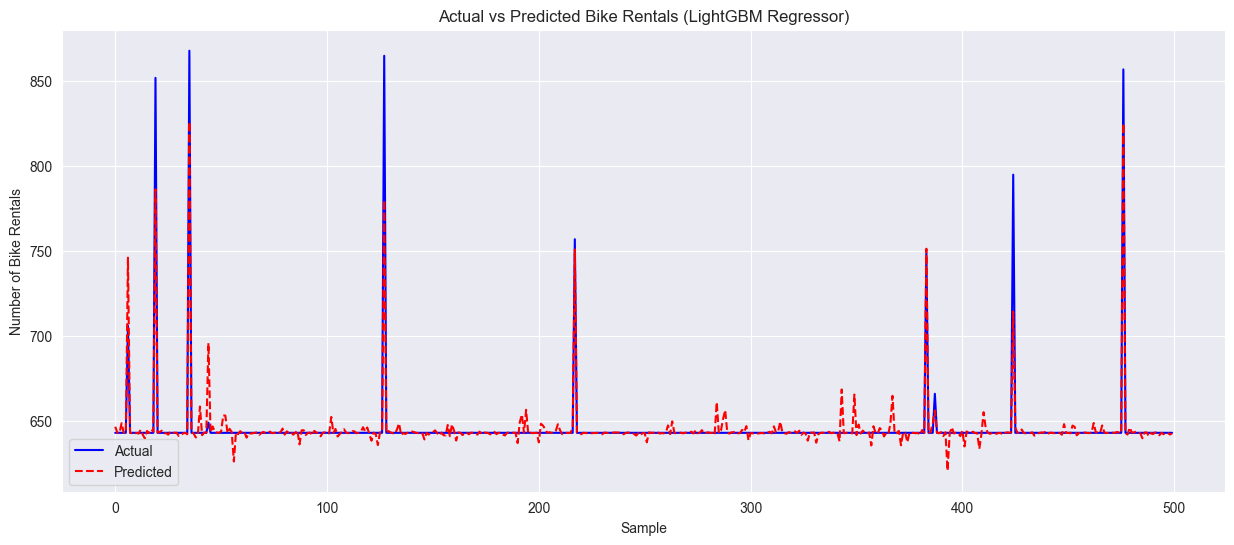

In [35]:
plot_predictions(500, 'LightGBM Regressor', pred_test_lbm)

# Final Model

In [63]:
final_model = joblib.load('final_model.plk')

In [64]:
import pandas as pd

# Extract feature importance
feature_importances = final_model.feature_importance(importance_type='split')
# Create DataFrame for variable importance
var_imp = pd.DataFrame({'var': X_train.columns, 'imp': feature_importances})
var_imp.sort_values(['imp'], ascending=False, inplace=True)

In [65]:
var_imp

,var,imp
6,instant,3101
0,temp_squared,1690
11,temp_difference,1627
5,atemp,1147
18,week_of_year,1147
...,...,...
57,hr_23,0
56,hr_22,0
55,hr_21,0
39,hr_5,0


In [82]:
# Select top 10 variables
top_var = var_imp.nlargest(33, 'imp')['var'].tolist()
train_data = lgb.Dataset(X_train[top_var], label=y_train)
valid_data = lgb.Dataset(X_val[top_var], label=y_val, reference=train_data)
final_model = lgb.train(best_params,
                  train_data,
                  valid_sets=[train_data, valid_data])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 938
[LightGBM] [Info] Number of data points in the train set: 10427, number of used features: 33
[LightGBM] [Info] Start training from score 646.162655
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[348]	training's l2: 40.2272	valid_1's l2: 120.868


In [83]:
pred_test_final = predict_metric(final_model, top_var)

MAE: train 1.8413, validation 2.8431, test 2.5577
MSE: train 40.2272, validation 120.8683, test 111.4328
R2: train 0.9223, validation 0.7584, test 0.7713


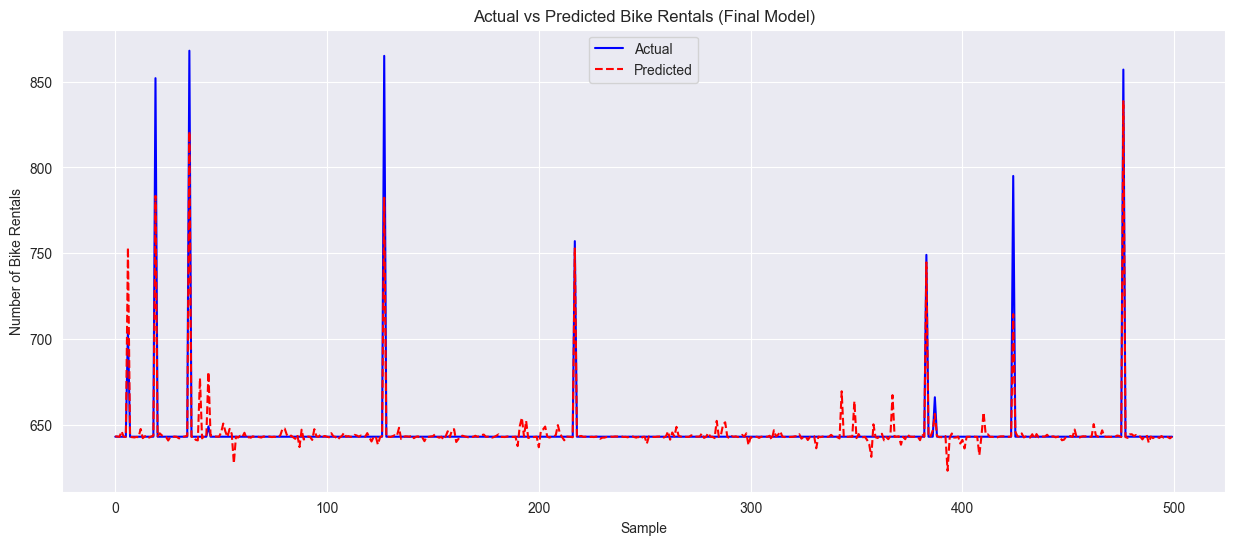

In [84]:
plot_predictions(500, 'Final Model', pred_test_final)

In [85]:
joblib.dump(final_model, 'FINAL_MODEL_IMPROVED.plk')

['FINAL_MODEL_IMPROVED.plk']

* We have applied feature selection and the model has slightly improved using 33 features instead of 69.

## **Conclusion**

---

### **1. Data Preprocessing** 
- The dataset underwent thorough preprocessing, addressing missing values, outliers, and encoding categorical variables. This set a strong foundation for the next steps.

### **2. Model Exploration** 
- A diverse set of models, including Random Forest, XGBoost, Linear Regression, and LightGBM, were explored. They were evaluated using metrics such as MAE, MSE, and R2.

### **3. Overfitting Challenge** 
- A common trend was overfitting, where models excelled with training data but faltered on validation/test sets. This hinted at models potentially being too intricate.

### **4. The Role of Regularization** 
- To tackle overfitting, regularization came to the rescue, especially with tree-based models. It effectively penalizes models that align too closely with training data.

### **5. The Best Performer - LightGBM** 
- Among all, LightGBM was the star. Its speed, capability to manage categories directly, and resistance to overfitting (with the right tuning) made it shine brighter than the rest.

---

### **Final Thoughts**
- LightGBM outperformed others in our tests. Thanks to careful regularization and feature selection, its efficiency was even more evident. This model's predictions will aid in better bike allocation, leading to cost savings and happier users. Plus, it ensures bikes are available as needed, cutting down on costs and amplifying user satisfaction.
